# Chapter1
## 题目1

根据以下方法构造算法和MATLAB程序，以便精确计算所有情况下的二次方程的根，包括$|b| \approx \sqrt{b^2 - 4ac}$的情况。

设$a \neq 0, b^2 - 4ac > 0$，且有方程$ax^2 + bx + c = 0$，则通过如下二次根公式可解出方程的根：

\begin{equation}
x_1=\frac{-b+\sqrt{b^2-4ac}}{2a}  \quad \quad x_2=\frac{-b-\sqrt{b^2-4ac}}{2a}
\label{eq1}
\tag{1}
\end{equation}

通过将分子有理化，可以等价变换成下列公式

\begin{equation}
x_1=\frac{-2c}{b+\sqrt{b^2-4ac}} \quad \quad x_2=\frac{-2c}{b-\sqrt{b^2-4ac}}
\label{eq2}
\tag{2}
\end{equation}

当$|b| \approx \sqrt{b^2 - 4ac}$，必须小心处理，以避免其值过小而引起巨量消失（catastrophic cancellation）而带来精度损失。

- 当$b > 0$的时候应使用公式(\ref{eq2})计算$x_1$，应使用公式(\ref{eq1})计算$x_2$。
- 当$b < 0$的时候应使用公式(\ref{eq1})计算$x_1$，应使用公式(\ref{eq2})计算$x_2$。

### 实验代码

In [5]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Math


In [6]:
sp.init_printing()
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [7]:
def solve_quad(a, b, c):
    delta = b * b - 4 * a * c
    if delta < 0:
        return None 
    elif delta == 0:
        return [-b / (2 * a)]
    elif b > 0:
        return [-2 * c / (b + np.sqrt(delta)),
                (-b - np.sqrt(delta)) / (2 * a)]
    elif b < 0:
        return [(-b + np.sqrt(delta)) / (2 * a),
                -2 * c / (b - np.sqrt(delta))]

def disp_solve_quad(a, b, c):
    res = solve_quad(a, b, c)
    x = sp.Symbol('x')
    f = a * x * x + b * x + c
    if res is None:
        display(Math('方程 %s = 0 无解.' % sp.latex(f)))
    elif len(res) == 1:
        display(Math('方程 %s = 0 有一解: x = %.12f.' % (sp.latex(f), res[0])))
    else:
        display(Math('方程 %s = 0 有两解: x_0 = %.12f, x_1 = %.12f.' % (sp.latex(f), res[0], res[1])))

def bmatrix(a):
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

In [8]:
disp_solve_quad(1, 0, 1)
disp_solve_quad(1, 2, 1)
disp_solve_quad(1, 2.001, 1)
disp_solve_quad(1, -1000.001, 1)
disp_solve_quad(1, -1000.0001, 1)
disp_solve_quad(1, -1000.00001, 1)
disp_solve_quad(1, -1000.000001, 1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## 题目 2

对下列3个差分方程计算出前十个数值近似值。在每种情况下引入一个小的初始误差。如果没有初始误差，则每个差分方程将生成序列$\left\{1/2^n\right\}_{n=1}^\infty$，构造误差表和误差图。

(a) $r_0=0.994,r_n=\frac{1}{2}r_{n-1},n=1,2,\cdots$<br />
(b) $p_0=1,p_1=0.497,p_n=\frac{3}{2}p_{n-1}-\frac{1}{2}p_{n-2},n=2,3,\cdots$<br />
(c) $q_0=1,q_1=0.497,q_n=\frac{5}{2}q_{n-1}-q_{n-2},n=2,3,\cdots$<br />

### 实验代码

生成数列$s_n = \left\{1/2^n\right\}_{n=1}^\infty$：

In [11]:
n = 10
s = [1]
for i in range(1, n):
    s.append(0.5 * s[i - 1])
s = np.array(s)
print(s)

[1.         0.5        0.25       0.125      0.0625     0.03125
 0.015625   0.0078125  0.00390625 0.00195312]


生成数列$r_n$：

In [12]:
r = [0.994]
for i in range(1, n):
    r.append(0.5 * r[i - 1])
r = np.array(r)
r

array([0.994     , 0.497     , 0.2485    , 0.12425   , 0.062125  ,
       0.0310625 , 0.01553125, 0.00776562, 0.00388281, 0.00194141])

生成数列$p_n$：

In [13]:
p = [1, 0.497]
for i in range(2, n):
    p.append(1.5 * p[i - 1] - 0.5 * p[i - 2])
p = np.array(p)
p

array([ 1.        ,  0.497     ,  0.2455    ,  0.11975   ,  0.056875  ,
        0.0254375 ,  0.00971875,  0.00185938, -0.00207031, -0.00403516])

生成数列$q_n$：

In [15]:
q = [1, 0.497]
for i in range(2, n):
    q.append(2.5 * q[i - 1] - q[i - 2])
q = np.array(q)
q

array([ 1.        ,  0.497     ,  0.2425    ,  0.10925   ,  0.030625  ,
       -0.0326875 , -0.11234375, -0.24817188, -0.50808594, -1.02204297])

数列$s_n, r_n, p_n, q_n$的前10项：

In [16]:
pd.options.display.float_format = '{:,.12f}'.format
df1 = pd.DataFrame(np.array([s, r, p, q]).T, columns=['$s_n$', '$r_n$', '$p_n$', '$q_n$'])
df1

,$s_n$,$r_n$,$p_n$,$q_n$
0,1.000000000000,0.994000000000,1.000000000000,1.000000000000
1,0.500000000000,0.497000000000,0.497000000000,0.497000000000
2,0.250000000000,0.248500000000,0.245500000000,0.242500000000
3,0.125000000000,0.124250000000,0.119750000000,0.109250000000
4,0.062500000000,0.062125000000,0.056875000000,0.030625000000
5,0.031250000000,0.031062500000,0.025437500000,-0.032687500000
6,0.015625000000,0.015531250000,0.009718750000,-0.112343750000
7,0.007812500000,0.007765625000,0.001859375000,-0.248171875000
8,0.003906250000,0.003882812500,-0.002070312500,-0.508085937500
9,0.001953125000,0.001941406250,-0.004035156250,-1.022042968750


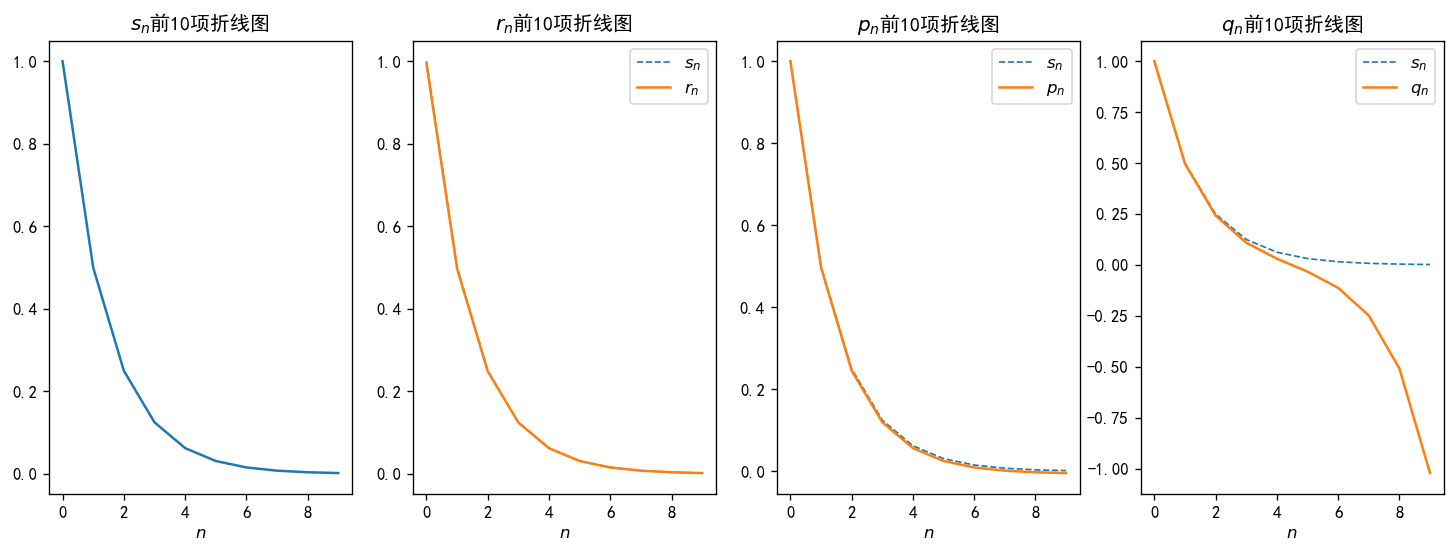

In [17]:
#绘制每个数列的前10项的折线图：
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('$s_n$前10项折线图')
plt.xlabel('$n$')
plt.plot(s)

plt.subplot(1, 4, 2)
plt.title('$r_n$前10项折线图')
plt.xlabel('$n$')
plt.plot(s, linewidth=1, linestyle='--', label='$s_n$')
plt.plot(r, label='$r_n$')
plt.legend(loc='upper right')

plt.subplot(1, 4, 3)
plt.title('$p_n$前10项折线图')
plt.xlabel('$n$')
plt.plot(s, linewidth=1, linestyle='--', label='$s_n$')
plt.plot(p, label='$p_n$')
plt.legend(loc='upper right')

plt.subplot(1, 4, 4)
plt.title('$q_n$前10项折线图')
plt.xlabel('$n$')
plt.plot(s, linewidth=1, linestyle='--', label='$s_n$')
plt.plot(q, label='$q_n$')
plt.legend(loc='upper right')

plt.savefig('fig1.png', bbox_inches='tight')

In [18]:
#数列$s_n$与$r_n, p_n, q_n$之差的前10项：
err_r, err_p, err_q = s - r, s - p, s - q
df2 = pd.DataFrame(np.array([err_r, err_p, err_q]).transpose(), columns=['$s_n - r_n$', '$s_n - p_n$', '$s_n - q_n$'])
df2

,$s_n - r_n$,$s_n - p_n$,$s_n - q_n$
0,0.006000000000,0.000000000000,0.000000000000
1,0.003000000000,0.003000000000,0.003000000000
2,0.001500000000,0.004500000000,0.007500000000
3,0.000750000000,0.005250000000,0.015750000000
4,0.000375000000,0.005625000000,0.031875000000
5,0.000187500000,0.005812500000,0.063937500000
6,0.000093750000,0.005906250000,0.127968750000
7,0.000046875000,0.005953125000,0.255984375000
8,0.000023437500,0.005976562500,0.511992187500
9,0.000011718750,0.005988281250,1.023996093750


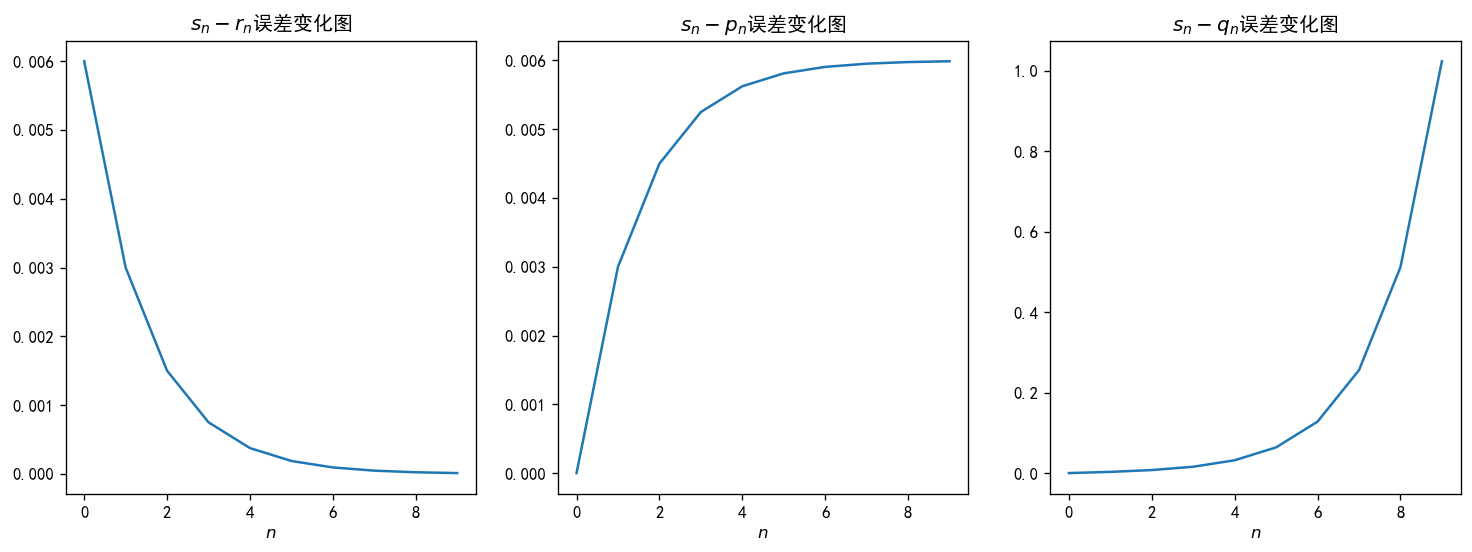

In [19]:
#绘制每个数列的前10项的误差折线图：
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('$s_n - r_n$误差变化图')
plt.xlabel('$n$')
plt.plot(err_r)
plt.subplot(1, 3, 2)
plt.title('$s_n - p_n$误差变化图')
plt.xlabel('$n$')
plt.plot(err_p)
plt.subplot(1, 3, 3)
plt.title('$s_n - q_n$误差变化图')
plt.xlabel('$n$')
plt.plot(err_q)
plt.savefig('fig2.pdf', bbox_inches='tight')

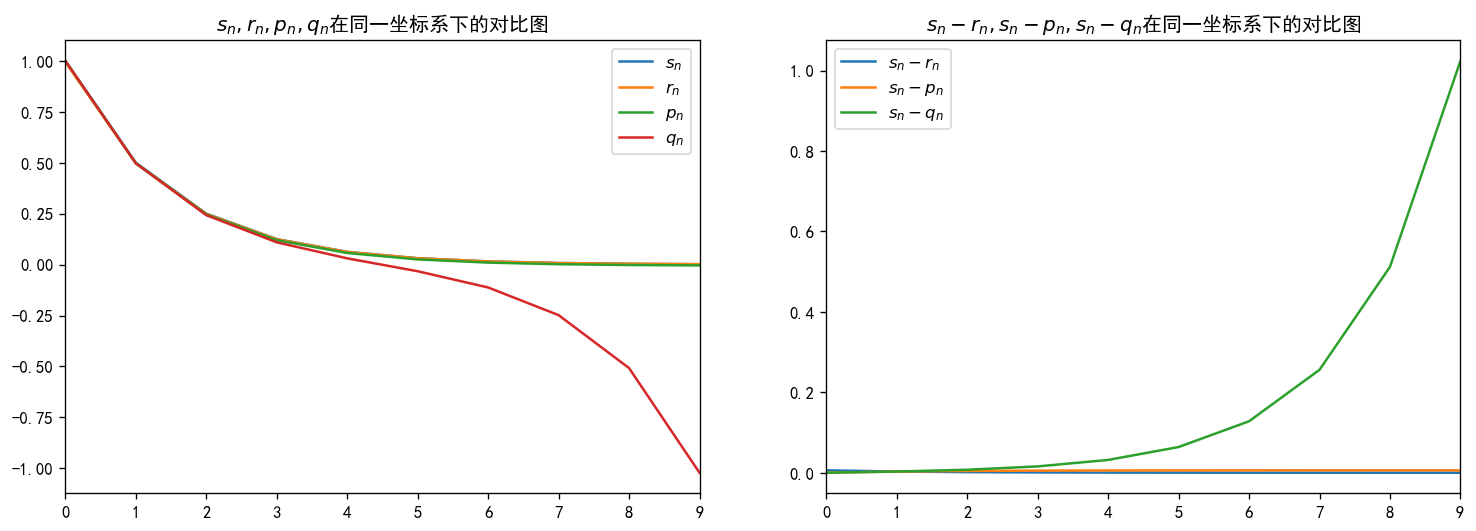

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df1.plot(ax=axes[0], title='$s_n, r_n, p_n, q_n$在同一坐标系下的对比图')
df2.plot(ax=axes[1], title='$s_n - r_n, s_n - p_n, s_n - q_n$在同一坐标系下的对比图')
plt.savefig('fig3.pdf', bbox_inches='tight')